## Building and Training Neural Networks

Before we dig into how to build neural networks from scratch, let's load a few popular libraries that we'll need:

In [1]:
import tensorflow as tf
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

We'll also need our custom `draw_nn_graph` function for visualizing these networks:

In [2]:
from visualization import draw_nn_graph

## Constructing a Simple Neural Network

Let's take another look at the simple linear-regression-based neural network that we examined in the previous lesson:

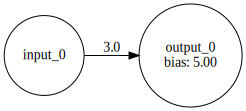

In [3]:
# load simple model for comparison
nn_linear_regression = tf.keras.models.load_model('models/linear-regression.h5')
draw_nn_graph(nn_linear_regression)

To build a simple model like this, we'll use the high-level [Keras](https://www.tensorflow.org/guide/keras) API provided by tensorflow, which we import as follows:

In [4]:
from tensorflow import keras

We can create the skeleton of a Keras neural network using the following code: 

In [5]:
# build an empty model
model = keras.Sequential()

Now, we'll add the output neuron pictured in the diagram above (note that it isn't hooked up to our network yet): 

In [6]:
# build output layer
output_layer = keras.layers.Dense(
    name="output",
    units=1, 
    input_shape=(1,)
)

We can hook this output neuron up to our network using the `add` method of our `model`:

In [7]:
# hook up output layer
model.add(output_layer)

Let's visualize the result of these operations:

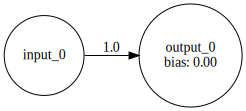

In [8]:
# visualize model
draw_nn_graph(model)

Notice that the weight and bias values shown above do not match the respective values from our original diagram. Since we did not tell it to do otherwise, Keras has initialized the biases in our model to zero and the weights to randomly chosen values. 

Let's now repeat the steps above, but also take care to set the weight and bias values of our model to the correct values. First, we'll start with a clean `Sequential` model:

In [9]:
# start with a clean model
model_correct = keras.Sequential()

This time, we'll pass the `kernel_initializer` and `bias_initializer` arguments when we create our output neuron in order to properly set the weights and biases:

In [10]:
# build the layer with the right parameter values
output_correct = keras.layers.Dense(
    name="output",
    units=1,
    input_shape=(1,),
    kernel_initializer=keras.initializers.constant(3.0),
    bias_initializer=keras.initializers.constant(5.0)
)

Now, let's hook this new output neuron up to our new network:

In [11]:
# add the correct output layer to our model
model_correct.add(output_correct)

When we visualize our new network, we can see that the weight and bias values are correct:

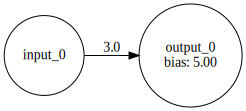

In [12]:
# now can see that values are correct
draw_nn_graph(model_correct)

## Building a Multi-Layer Neural Network

There is no limit to how many layers we can add to our neural network. Let's create an example network containing one hidden layer and one output layer:

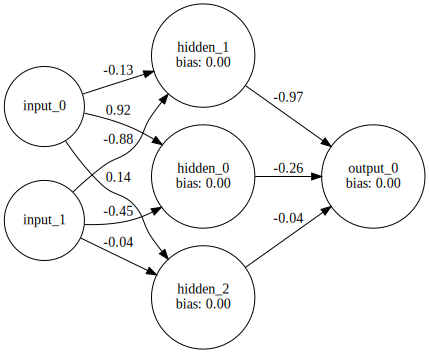

In [13]:
# import this way to make code more readable
from tensorflow.keras import layers

# can add as many layers as we wish
model_3_layers = keras.Sequential()
model_3_layers_hidden = layers.Dense(
    name="hidden",
    units=3,
    input_shape=(2,)
)
model_3_layers_output = layers.Dense(
    name="output",
    units=1
)
model_3_layers.add(model_3_layers_hidden)
model_3_layers.add(model_3_layers_output)
draw_nn_graph(model_3_layers)

In order to shorten the code above, we can instead pass our layers as arguments to the `Sequential` function, which allows us to trim away the calls to `add`:

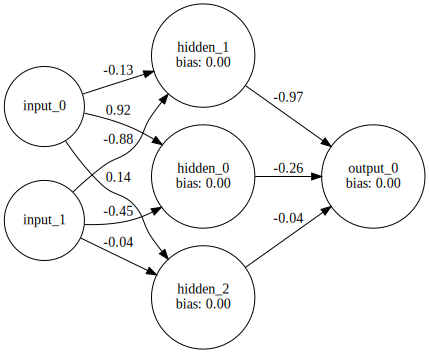

In [14]:
# More convenient way of writing the above
model_3_layers_more_convenient = tf.keras.Sequential(
    [
        model_3_layers_hidden,
        model_3_layers_output
    ]
)
draw_nn_graph(model_3_layers_more_convenient)

To make our code even more compact, we can create the layers inline in order to fully specify the model in a single step:

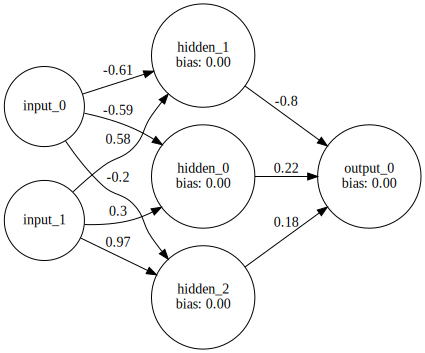

In [15]:
# even more convenient - create everything at once
model_3_layers_even_more_convenient = tf.keras.Sequential(
    [
        layers.Dense(
            name="hidden",
            units=3,
            input_shape=(2,)
        ),
        layers.Dense(
            name="output",
            units=1
        )
    ]
)
draw_nn_graph(model_3_layers_even_more_convenient)

## Adding an Activation Function

In order to add activation functions to our neurons so that we can model functions with more interesting shapes, all we need to do is pass an additional `activation` argument to each neuron that we create:

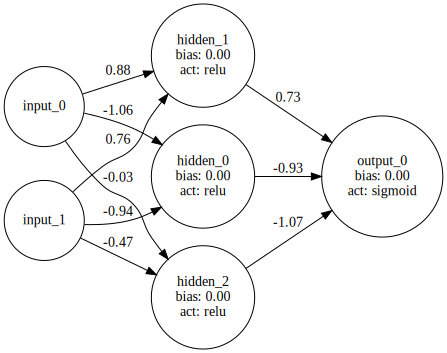

In [16]:
# activation function
model_w_activation = tf.keras.Sequential(
    [
        layers.Dense(
            name="hidden",
            units=3,
            input_shape=(2,),
            activation="relu"
        ),
        layers.Dense(
            name="output",
            units=1,
            activation="sigmoid"
        )
    ]
)
draw_nn_graph(model_w_activation)

## Looking "Under the Hood" of Our Model: The Weights

All of the numbers that define our neural network (the weights and the biases) are stored in a data structure that we'll call "the model weights" - we can look at this data structure as follows:

In [17]:
weights = model_w_activation.get_weights()
weights

[array([[-1.0570867 ,  0.88223386, -0.02645457],
        [-0.9439961 ,  0.75666344, -0.472427  ]], dtype=float32),
 array([0., 0., 0.], dtype=float32),
 array([[-0.9254637],
        [ 0.734987 ],
        [-1.0732952]], dtype=float32),
 array([0.], dtype=float32)]

This looks quite complicated - let's step back and figure out what we're dealing with:

In [18]:
type(weights)

list

So, `weights` is a list - it turns out there are two entries per layer of our network (excluding the input layer) - since our network has a hidden layer and an output layer, we can see that there are four entries in `weights`:

In [19]:
len(weights)

4

Each of these entries is a `numpy` array with a particular shape:

In [20]:
weights[0].shape

(2, 3)

In [21]:
model_w_activation.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 3)                 9         
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


Let's look at the weights associated with our hidden layer - you should compare the values below against the numbers printed next to the arrows in the network visualization above:

In [22]:
hidden_layer_weights = weights[0]
print("weights for first neuron:", hidden_layer_weights[:,0])
print("weights for second neuron:", hidden_layer_weights[:,1])
print("weights for third neuron:", hidden_layer_weights[:,2])

weights for first neuron: [-1.0570867 -0.9439961]
weights for second neuron: [0.88223386 0.75666344]
weights for third neuron: [-0.02645457 -0.472427  ]


As we can see from the output above, the columns of this array correspond to different neurons and the rows correspond to individual inbound edges. The next entry in the `weights` list is the array of biases for this layer, one per neuron: 

In [23]:
hidden_layer_biases = weights[1]
hidden_layer_biases

array([0., 0., 0.], dtype=float32)

If we continue moving through the `weights` list, you can see that we arrive at the output layer weights and biases:

In [24]:
output_layer_weights = weights[2]
print("weight shape:", output_layer_weights.shape)
print("weight values:", output_layer_weights)

weight shape: (3, 1)
weight values: [[-0.9254637]
 [ 0.734987 ]
 [-1.0732952]]


In [25]:
output_layer_biases = weights[3]
print("bias shape:", output_layer_biases.shape)
print("bias values:", output_layer_biases)

bias shape: (1,)
bias values: [0.]


<span style="color:blue;font-weight:bold">Exercise</span>: Create a neural network with:

* One hidden layer named `"hidden-layer-one"`consisting of five neurons with the activation function `"tanh"`, with an `input_shape` of `(2,)` indicating two input neurons
* An output layer named `"output-layer-one"` consisting of three neurons with the `"softmax"` activation function

Store your neural network in the variable `my_model`.

In [29]:
# delete this entire line and replace it with your code

my_model = tf.keras.Sequential([
    tf.keras.layers.Dense(name="hidden-layer-one", units=5, input_shape=(2,), activation="tanh"),
    tf.keras.layers.Dense(name="output-layer-one", activation="softmax", units=3)
])

In [29]:
check_variable_definition("my_model")
assert str(type(my_model)) ==  "<class 'tensorflow.python.keras.engine.sequential.Sequential'>", "Your variable <code>my_model</code> does not contain an object of the right type - did you create it using <code>keras.Seqential()</code>?"
assert len(my_model.layers) == 2, "Your model does not contain the correct number of layers."
assert my_model.layers[0].name == 'hidden-layer-one', "Your hidden layer does not have the correct name value."
assert my_model.layers[1].name == 'output-layer-one', "Your output layer does not have the correct name value."
assert my_model.layers[0].units == 5, "Your hidden layer does not contain the correct number of neurons."
assert my_model.layers[1].units == 3, "Your output layer does not contain the correct number of neurons."
assert my_model.layers[0].activation.__name__ == "tanh",  "Your hidden layer does not use the correct activation function."
assert my_model.layers[1].activation.__name__ == "softmax",  "Your output layer does not use the correct activation function."
success()

In [30]:
my_model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden-layer-one (Dense)     (None, 5)                 15        
_________________________________________________________________
output-layer-one (Dense)     (None, 3)                 18        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________


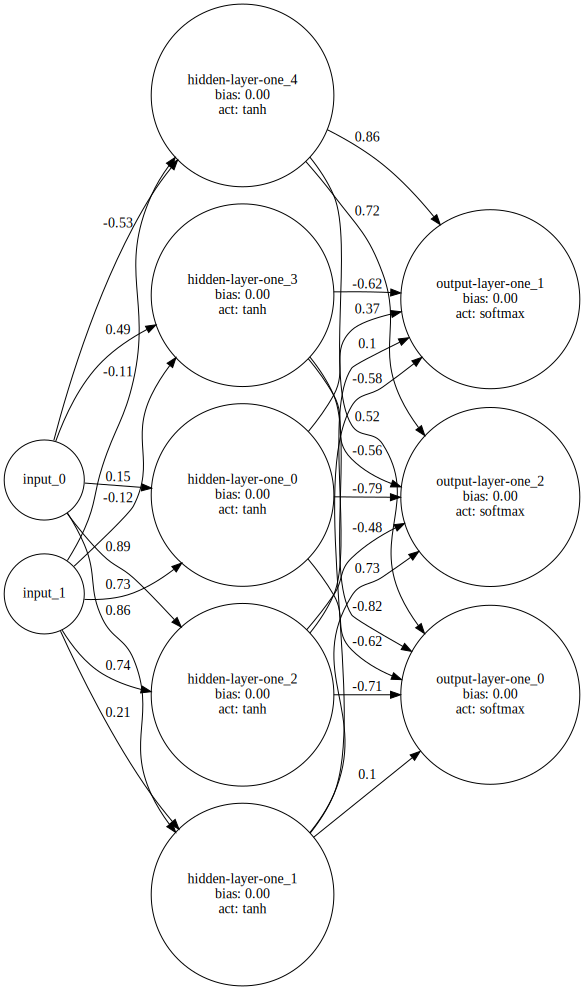

In [31]:
draw_nn_graph(my_model)